### Web App de Machine Learning para previsão das doenças de diabetes, hipertensão e infarto do miocárdio

### Bibliotecas

In [1]:
#%pip install notebook lightgbm
#%pip install scikit-optimize

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from lightgbm import LGBMClassifier

from skopt import dummy_minimize
from skopt import gp_minimize

### Base de dados

In [2]:
diabetes = pd.read_csv('diabetes_data.csv')
hipertensao = pd.read_csv('hypertension_data.csv')
infarto = pd.read_csv('hypertension_data.csv')

In [3]:
diabetes.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
hipertensao.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
infarto.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


Verificação da qualidade das features

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [7]:
hipertensao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


In [8]:
hipertensao.isnull().sum()

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [9]:
## precisaremos imputar dados da variael sexo
hipertensao.sex.value_counts()

1.0    13029
0.0    13029
Name: sex, dtype: int64

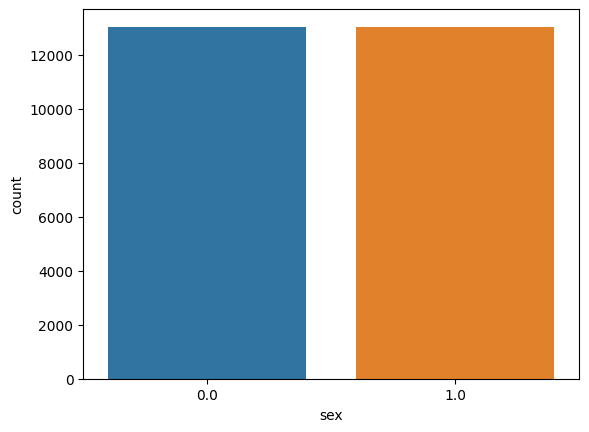

In [10]:
sns.countplot(x = 'sex', data = hipertensao)
plt.show()

In [11]:
homens_add = np.repeat(1,13) ## 13 homens
mulheres_add = np.repeat(0,12) ## 12 mulheres

sexos_add = list(homens_add) + list(mulheres_add)

np.random.seed(10)
permutation = np.random.permutation(len(sexos_add))
sexos_input = np.array(sexos_add)
sexos_input = sexos_input [permutation]

In [12]:
sexos_input # lista aletória quase balanceada

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1])

In [13]:
indexes_na_sex = hipertensao['sex'][hipertensao['sex'].isna()].index
hipertensao['sex'].iloc[indexes_na_sex] = sexos_input

C:\Users\NetoDavi\AppData\Local\Temp\ipykernel_10296\1296372292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hipertensao['sex'].iloc[indexes_na_sex] = sexos_input


In [14]:
infarto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


In [15]:
infarto.isna().sum()

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [16]:
infarto.sex.value_counts() # balanceado

1.0    13029
0.0    13029
Name: sex, dtype: int64

In [17]:
infarto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


<AxesSubplot: xlabel='sex', ylabel='count'>

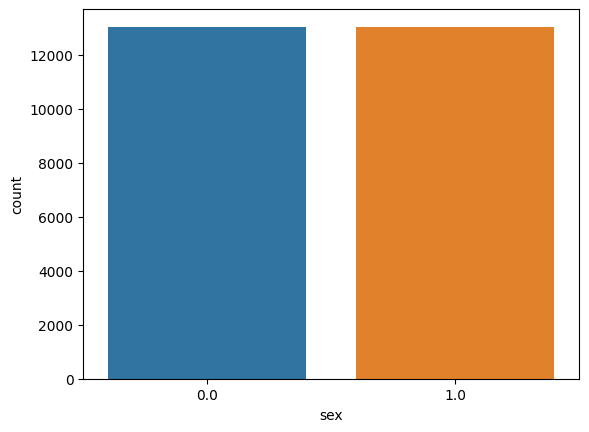

In [18]:
sns.countplot(x = 'sex', data = hipertensao)

In [19]:
homens_val = np.repeat(1, 12) # 12 homens
mulheres_val = np.repeat(0, 13) # 13 mulheres

np.random.seed(15)
sex_input = np.concatenate((homens_val, mulheres_val))
ind_sex_input = np.random.permutation(len(sex_input))
sex_input = sex_input[ind_sex_input]

In [20]:
na_index = infarto['sex'][infarto['sex'].isna()].index
infarto["sex"].iloc[na_index] = sex_input

C:\Users\NetoDavi\AppData\Local\Temp\ipykernel_10296\3928874816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infarto["sex"].iloc[na_index] = sex_input


In [21]:
infarto

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,72.0,0.0,0,138,294,1,1,106,0,1.9,1,3,2,0
26079,60.0,1.0,0,144,200,0,0,126,1,0.9,1,0,3,0
26080,68.0,1.0,0,100,234,0,1,156,0,0.1,2,1,3,0
26081,67.0,1.0,1,154,232,0,0,164,0,0.0,2,1,2,0


In [22]:
infarto.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Verificação em segunda etapa da qualidade das features

In [23]:
diabetes.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [24]:
hipertensao.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [25]:
infarto.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Balanceamento do target

<AxesSubplot: xlabel='Diabetes', ylabel='count'>

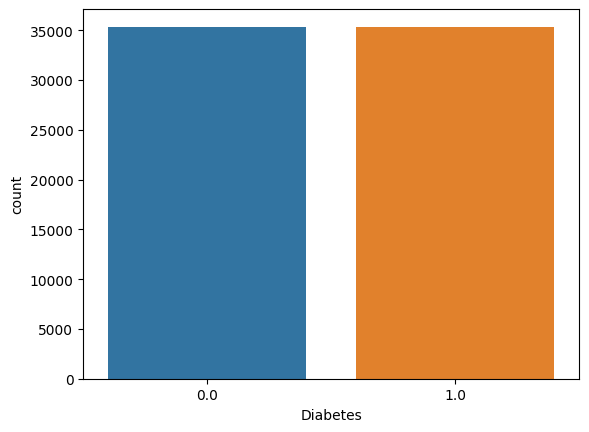

In [26]:
sns.countplot(x = "Diabetes", data = diabetes)

<AxesSubplot: xlabel='target', ylabel='count'>

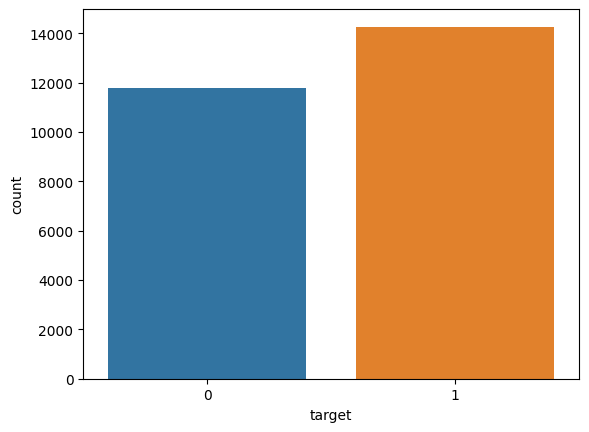

In [27]:
sns.countplot(x = "target", data = hipertensao)

<AxesSubplot: xlabel='target', ylabel='count'>

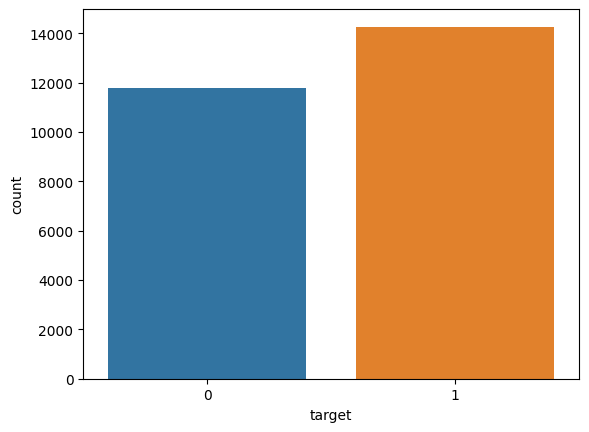

In [28]:
sns.countplot(x = "target", data = infarto)

### Análise Exploratória de Dados

### Separação de features e target para cada doença

In [29]:
## diabetes
X_db = diabetes.iloc[:,:-1].values
y_db = diabetes.iloc[:,-1].values

## hipertensão
X_hp = hipertensao.iloc[:,:-1].values
y_hp = hipertensao.iloc[:,-1].values

## infarto do coração
X_ic = infarto.iloc[:,:-1].values
y_ic = infarto.iloc[:,-1].values

### Criação dos conjuntos de dados de treino, validação e  teste

In [30]:
diabetes.shape, hipertensao.shape, infarto.shape

((70692, 18), (26083, 14), (26083, 14))

Separar 60% (treino), 20% (validação) e 20% (teste)

In [31]:
## separação em treino e teste

X_train_db, X_test_db, y_train_db, y_test_db = train_test_split(X_db, y_db, test_size=0.2, random_state=12)

X_train_hp, X_test_hp, y_train_hp, y_test_hp = train_test_split(X_hp, y_hp, test_size=0.2, random_state=12)

X_train_ic, X_test_ic, y_train_ic, y_test_ic = train_test_split(X_ic, y_ic, test_size=0.2, random_state=12)

In [32]:
## separação em treino e validação

X_train_db, X_valid_db, y_train_db, y_valid_db = train_test_split(X_train_db, y_train_db, test_size=0.25, random_state=12)

X_train_hp, X_valid_hp, y_train_hp, y_valid_hp = train_test_split(X_train_hp, y_train_hp, test_size=0.25, random_state=12)

X_train_ic, X_valid_ic, y_train_ic, y_valid_ic = train_test_split(X_train_ic, y_train_ic, test_size=0.25, random_state=12)

In [33]:
X_train_db.shape, X_test_db.shape, X_valid_db.shape # quantidade de amostra para cada conjunto

((42414, 17), (14139, 17), (14139, 17))

In [34]:
X_train_hp.shape, X_test_hp.shape # quantidade de amostra para cada conjunto

((15649, 13), (5217, 13))

In [35]:
X_train_ic.shape, X_test_ic.shape # quantidade de amostra para cada conjunto

((15649, 13), (5217, 13))

## Turnar o modelo por otimização bayesiana para cada caso

Diabetes

In [36]:
def modeling_training(params):

    ## hyperparametros importantes do modelo
    learning_rate = params[0]
    num_leaves = params[1]
    min_child_samples = params[2]
    subsample = params[3]
    colsample_bytree = params[4]

    print(params, '\n')

    ## poderoso classificador

    clf_db = LGBMClassifier(learning_rate=learning_rate, num_leaves=num_leaves,
                         min_child_samples=min_child_samples, subsample=subsample,
                         colsample_bytree=colsample_bytree, random_state=12, subsample_freq=
                         1, n_estimators=200)
    
    ## treinamento do modelo
    clf_db.fit(X_train_db, y_train_db)

    prob_db = clf_db.predict_proba(X_valid_db)[:,1]

    return -roc_auc_score(y_valid_db, prob_db)



In [47]:
parametric_hyper = [(1e-3, 1e-1, 'log-uniform'),     ## learning rate
                        (2, 128),                    ## num_leaves
                        (1, 100),                    ## min_child_samples
                        (0.05, 1.0),                 ## subsample
                        (0.1, 1.0)]                  ## colsample_bytree

## resultado pelo Random Search
result_rs = dummy_minimize(modeling_training, parametric_hyper, random_state = 12, verbose = 1, n_calls=30)

Iteration No: 1 started. Evaluating function at random point.
[0.007806268575229839, 127, 3, 0.5570524237112829, 0.11311746623687771] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.7653
Function value obtained: -0.8086
Current minimum: -0.8086
Iteration No: 2 started. Evaluating function at random point.
[0.06878504348963209, 54, 6, 0.08175035624502737, 0.9612544026476052] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.7366
Function value obtained: -0.8132
Current minimum: -0.8132
Iteration No: 3 started. Evaluating function at random point.
[0.0018811292773518794, 2, 77, 0.9470138792503902, 0.8674619869983565] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.3170
Function value obtained: -0.7719
Current minimum: -0.8132
Iteration No: 4 started. Evaluating function at random point.
[0.001010458466252994, 37, 34, 0.5744357516013383, 0.5368396722964388] 

Iteration No: 4 ended. Evaluation done at random point.
Time 

In [48]:
print("Hyperparâmetros tunados:", result_rs.x)
print("Melhor valor do AUC score:", result_rs.fun*-1)

Hyperparâmetros tunados: [0.019247098226788873, 29, 67, 0.8238640079377308, 0.5543472516112128]
Melhor valor do AUC score: 0.829322133997611


In [49]:
%pip install "numpy<1.24.0" 
import numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
resultados_bayes = gp_minimize(modeling_training, parametric_hyper, random_state=12, verbose=1, n_calls=30, n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
[0.007806268575229839, 112, 10, 0.7374217131275402, 0.4154304484044933] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1.1858
Function value obtained: -0.8262
Current minimum: -0.8262
Iteration No: 2 started. Evaluating function at random point.
[0.0011693064425584592, 39, 9, 0.7396564530607228, 0.43555101495568094] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.7560
Function value obtained: -0.8235
Current minimum: -0.8262
Iteration No: 3 started. Evaluating function at random point.
[0.02249029563351141, 126, 49, 0.916911892236369, 0.27088870979177526] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 1.0689
Function value obtained: -0.8272
Current minimum: -0.8272
Iteration No: 4 started. Evaluating function at random point.
[0.00197673182175817, 116, 69, 0.959842293356962, 0.5104458308823736] 

Iteration No: 4 ended. Evaluation done at random point.
Time

In [51]:
print("Hyperparâmetros tunados:", resultados_bayes.x)
print("Melhor valor do AUC score:", resultados_bayes.fun*-1)

Hyperparâmetros tunados: [0.051919341062529795, 5, 33, 0.6493577231990691, 0.6617984593370421]
Melhor valor do AUC score: 0.8296689401436103


<AxesSubplot: title={'center': 'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

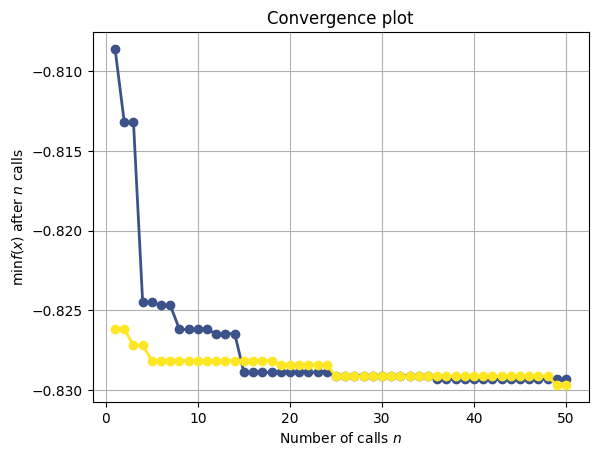

In [53]:
from skopt.plots import plot_convergence
plot_convergence(result_rs, resultados_bayes)

Hipertensão

In [58]:
## definição da função de hiparametrização

def training_hiper_hp(params):

    ## hyperparametros importantes do modelo
    learning_rate = params[0]
    num_leaves = params[1]
    min_child_samples = params[2]
    subsample = params[3]
    colsample_bytree = params[4]

    print(params, '\n')

    ## poderoso classificador

    clf_hp = LGBMClassifier(learning_rate=learning_rate, num_leaves=num_leaves,
                         min_child_samples=min_child_samples, subsample=subsample,
                         colsample_bytree=colsample_bytree, random_state=12, subsample_freq=
                         1, n_estimators=200)
    
    ## treinamento do modelo
    clf_hp.fit(X_train_hp, y_train_hp)

    prob_hp = clf_hp.predict_proba(X_valid_hp)[:,1]

    return -roc_auc_score(y_valid_hp, prob_hp)

In [59]:
## otimização por random search 
result_rs_hp = dummy_minimize(training_hiper_hp, parametric_hyper, random_state = 12, verbose = 1, n_calls=30)

Iteration No: 1 started. Evaluating function at random point.
[0.007806268575229839, 127, 3, 0.5570524237112829, 0.11311746623687771] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.4468
Function value obtained: -0.9865
Current minimum: -0.9865
Iteration No: 2 started. Evaluating function at random point.
[0.06878504348963209, 54, 6, 0.08175035624502737, 0.9612544026476052] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.5494
Function value obtained: -1.0000
Current minimum: -1.0000
Iteration No: 3 started. Evaluating function at random point.
[0.0018811292773518794, 2, 77, 0.9470138792503902, 0.8674619869983565] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.1550
Function value obtained: -0.8747
Current minimum: -1.0000
Iteration No: 4 started. Evaluating function at random point.
[0.001010458466252994, 37, 34, 0.5744357516013383, 0.5368396722964388] 

Iteration No: 4 ended. Evaluation done at random point.
Time 

In [62]:
print("Hyperparâmetros tunados:", result_rs_hp.x)
print("Melhor valor do AUC score:", result_rs_hp.fun*-1)

Hyperparâmetros tunados: [0.06878504348963209, 54, 6, 0.08175035624502737, 0.9612544026476052]
Melhor valor do AUC score: 1.0


In [60]:
## Otimização bayesiana 
result_bayes_hp = gp_minimize(training_hiper_hp, parametric_hyper, random_state=12, verbose=1, n_calls=30, n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
[0.007806268575229839, 112, 10, 0.7374217131275402, 0.4154304484044933] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1.0856
Function value obtained: -1.0000
Current minimum: -1.0000
Iteration No: 2 started. Evaluating function at random point.
[0.0011693064425584592, 39, 9, 0.7396564530607228, 0.43555101495568094] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.5289
Function value obtained: -0.9994
Current minimum: -1.0000
Iteration No: 3 started. Evaluating function at random point.
[0.02249029563351141, 126, 49, 0.916911892236369, 0.27088870979177526] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.9891
Function value obtained: -1.0000
Current minimum: -1.0000
Iteration No: 4 started. Evaluating function at random point.
[0.00197673182175817, 116, 69, 0.959842293356962, 0.5104458308823736] 

Iteration No: 4 ended. Evaluation done at random point.
Time

In [63]:
print("Hyperparâmetros tunados:", result_bayes_hp.x)
print("Melhor valor do AUC score:", result_bayes_hp.fun*-1)

Hyperparâmetros tunados: [0.007806268575229839, 112, 10, 0.7374217131275402, 0.4154304484044933]
Melhor valor do AUC score: 1.0


Infarto do miocárdio

In [67]:
## otimização por random search

## definição da função de hiparametrização

def training_hiper_ic(params):

    ## hyperparametros importantes do modelo
    learning_rate = params[0]
    num_leaves = params[1]
    min_child_samples = params[2]
    subsample = params[3]
    colsample_bytree = params[4]

    print(params, '\n')

    ## poderoso classificador

    clf_ic = LGBMClassifier(learning_rate=learning_rate, num_leaves=num_leaves,
                         min_child_samples=min_child_samples, subsample=subsample,
                         colsample_bytree=colsample_bytree, random_state=12, subsample_freq=
                         1, n_estimators=200)
    
    ## treinamento do modelo
    clf_ic.fit(X_train_ic, y_train_ic)

    prob_ic = clf_ic.predict_proba(X_valid_ic)[:,1]

    return -roc_auc_score(y_valid_ic, prob_ic)

In [68]:
result_rs_ic = dummy_minimize(training_hiper_ic, parametric_hyper, random_state = 12, verbose = 1, n_calls=30)

Iteration No: 1 started. Evaluating function at random point.
[0.007806268575229839, 127, 3, 0.5570524237112829, 0.11311746623687771] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.4646
Function value obtained: -0.9865
Current minimum: -0.9865
Iteration No: 2 started. Evaluating function at random point.
[0.06878504348963209, 54, 6, 0.08175035624502737, 0.9612544026476052] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.5705
Function value obtained: -1.0000
Current minimum: -1.0000
Iteration No: 3 started. Evaluating function at random point.
[0.0018811292773518794, 2, 77, 0.9470138792503902, 0.8674619869983565] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.1460
Function value obtained: -0.8747
Current minimum: -1.0000
Iteration No: 4 started. Evaluating function at random point.
[0.001010458466252994, 37, 34, 0.5744357516013383, 0.5368396722964388] 

Iteration No: 4 ended. Evaluation done at random point.
Time 

In [69]:
print("Hyperparâmetros tunados:", result_rs_ic.x)
print("Melhor valor do AUC score:", result_rs_ic.fun*-1)

Hyperparâmetros tunados: [0.06878504348963209, 54, 6, 0.08175035624502737, 0.9612544026476052]
Melhor valor do AUC score: 1.0


In [70]:
result_bayes_ic = gp_minimize(training_hiper_ic, parametric_hyper, random_state = 12, verbose=1, n_random_starts=10, n_calls=30)

Iteration No: 1 started. Evaluating function at random point.
[0.007806268575229839, 112, 10, 0.7374217131275402, 0.4154304484044933] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1.0897
Function value obtained: -1.0000
Current minimum: -1.0000
Iteration No: 2 started. Evaluating function at random point.
[0.0011693064425584592, 39, 9, 0.7396564530607228, 0.43555101495568094] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.6599
Function value obtained: -0.9994
Current minimum: -1.0000
Iteration No: 3 started. Evaluating function at random point.
[0.02249029563351141, 126, 49, 0.916911892236369, 0.27088870979177526] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 1.0532
Function value obtained: -1.0000
Current minimum: -1.0000
Iteration No: 4 started. Evaluating function at random point.
[0.00197673182175817, 116, 69, 0.959842293356962, 0.5104458308823736] 

Iteration No: 4 ended. Evaluation done at random point.
Time

In [71]:
print("Hyperparâmetros tunados:", result_bayes_ic.x)
print("Melhor valor do AUC score:", result_bayes_ic.fun*-1)

Hyperparâmetros tunados: [0.007806268575229839, 112, 10, 0.7374217131275402, 0.4154304484044933]
Melhor valor do AUC score: 1.0


<AxesSubplot: title={'center': 'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

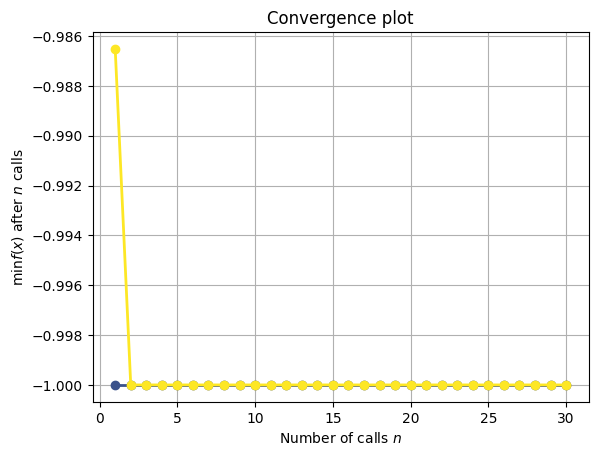

In [73]:
plot_convergence(result_bayes_ic, result_rs_ic)